# Štatistické testovanie hypotéz

URL https://github.com/FIIT-IAU/

**Chceme overiť, či má počet valcov motora vplyv na spotrebu.**

In [70]:
import pandas as pd
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn import preprocessing

In [71]:
cars = pd.read_csv('data/auto-mpg.data', 
                   delim_whitespace=True, 
                   names = ['mpg', 'cylinders', 'displacement','horsepower',
                            'weight', 'acceleration', 'model_year', 'origin', 'name'],
                   na_values='?')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## DÚ

**a. Analogicky k príkladu vyššie overte, či je rozdiel medzi spotrebou 4 a 6-valcových motorov signifikantný.**

b. Analogicky k príkladu vyššie overte, či je rozdiel medzi spotrebou 4 a 5-valcových motorov signifikantný.

c. Ešte lepší postup je použiť test, ktorý umožňuje otestovať viacero skupín naraz. Zovšeobecnením t-testu pre viacero skupín je **ANOVA (Analysis of variance)**.

Invisible note
<!--
Treba si dať pozor pri opakovanom párovom testovaní. S každým ďalším testom rastie pravdepodobnosť 1. rádu. Treba v takom prípade použiť korekciu pre opätovné testovanie, napr. *Bonferroniho korekciu*, kedy sa $p$-hodnota porovnáva voči hodnote $\alpha / m$, kde $\alpha$ je prípustná hodnota pravdepodobnosti chyby 1. rádu a $m$ je počet testovaných hypotéz (párových testov).
//-->

MannwhitneyuResult(statistic=563.0, pvalue=7.6391524456552e-34)

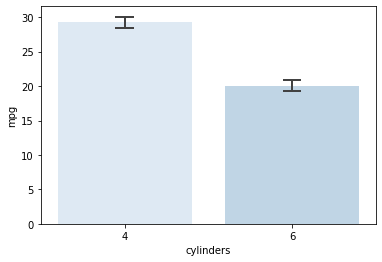

In [72]:
# a
# Keďže  𝑝<0,001 , pravdepodobnosť chyby 1. rádu (že  H0  je pravdivá a my ju zamietame) je menej ako 1 promile. 
# Našu nulovú hypotézu H0 teda zamietame v prospech alternatívnej hypotézy HA. Rozdiel v spotrebe medzi 6 a 4-valcovými motormi je štatisticky signifikantný.

mpg6 = cars.loc[cars.cylinders == 6, 'mpg']
mpg6_out = identify_outliers(mpg6)
mpg6 = mpg6.drop(mpg6_out.index)

mpg4 = cars.loc[cars.cylinders == 4, 'mpg']
mpg4_out = identify_outliers(mpg4)
mpg4 = mpg4.drop(mpg4_out.index)

sns.barplot(x='cylinders', y='mpg', data=cars[(cars.cylinders == 6) | (cars.cylinders == 4)], 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))
stats.mannwhitneyu(mpg6, mpg4)

MannwhitneyuResult(statistic=246.0, pvalue=0.571278103562181)

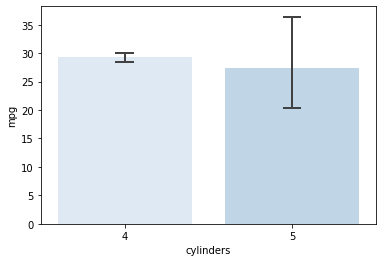

In [73]:
# b
# Keďže  𝑝>0,001 , pravdepodobnosť chyby 1. rádu (že  H0  je pravdivá a my ju zamietame) je viac ako 1 promile. 
# Našu nulovú hypotézu H0 teda nezamietame. Rozdiel v spotrebe medzi 5 a 4-valcovými motormi nie je štatisticky signifikantný.

mpg5 = cars.loc[cars.cylinders == 5, 'mpg']
mpg5_out = identify_outliers(mpg5)
mpg5 = mpg5.drop(mpg5_out.index)

mpg4 = cars.loc[cars.cylinders == 4, 'mpg']
mpg4_out = identify_outliers(mpg4)
mpg4 = mpg4.drop(mpg4_out.index)

sns.barplot(x='cylinders', y='mpg', data=cars[(cars.cylinders == 5) | (cars.cylinders == 4)], 
            capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))
stats.mannwhitneyu(mpg5, mpg4)

In [74]:
# c
# 
from scipy.stats import f_oneway

alpha = 0.05
mpg3 = cars.loc[cars.cylinders == 3, 'mpg']
mpg3_out = identify_outliers(mpg3)
mpg3 = mpg3.drop(mpg3_out.index)

mpg4 = cars.loc[cars.cylinders == 4, 'mpg']
mpg4_out = identify_outliers(mpg4)
mpg4 = mpg4.drop(mpg4_out.index)

mpg5 = cars.loc[cars.cylinders == 5, 'mpg']
mpg5_out = identify_outliers(mpg5)
mpg5 = mpg5.drop(mpg5_out.index)

mpg6 = cars.loc[cars.cylinders == 6, 'mpg']
mpg6_out = identify_outliers(mpg6)
mpg6 = mpg6.drop(mpg6_out.index)

mpg8 = cars.loc[cars.cylinders == 8, 'mpg']
mpg8_out = identify_outliers(mpg8)
mpg8 = mpg8.drop(mpg8_out.index)

# compare samples
stat, p = f_oneway(mpg3, mpg4, mpg5, mpg6, mpg8)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=204.738, p=0.000
Different distributions (reject H0)
